In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
from math import sqrt 
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

import math
import os
os.chdir('../data/')

dataframe = pd.read_csv('USD_KZT Historical Data.csv', usecols=[1], engine='python')
dataset = dataframe.iloc[::-1]
dataset = dataset.values
dataset = dataset.astype('float32')

In [4]:
!pip install pandas_ta

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
import time
import keras
from keras.layers import Input, LSTM, Bidirectional
from keras.models import load_model
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

Using TensorFlow backend.


In [6]:
def data_preparation2(d2,k):
    input_x, output_y = [], []
    for i in range(len(d2)-k-1):
        n = d2[i:(i+k), 0]
        input_x.append(n)
        output_y.append(d2[i + k, 0])
    return np.array(input_x), np.array(output_y)
k=10
train_size = int(len(dataset) * 0.70)
valid_size = int(len(dataset) * 0.15)
test_size = int(len(dataset) * 0.15)
train,valid,test = dataset[0:train_size,:], dataset[train_size:(train_size+valid_size),:],dataset[(train_size+valid_size):len(dataset),:]
print(len(train), len(valid), len(test))
train_X, train_y = data_preparation2(train, k)
valid_X, valid_y = data_preparation2(valid, k)
test_X, test_y = data_preparation2(test,k )

train_X1 = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
tscv = TimeSeriesSplit(n_splits=10)
valid_X1 = valid_X.reshape((valid_X.shape[0], valid_X.shape[1], 1))
X1vals_data=[]
yvals_data=[]
for train_index, val_index in tscv.split(valid_X1):
    X1_train, X1_valid = valid_X1[train_index], valid_X1[val_index]
    y_train, y_valid = valid_y[train_index], valid_y[val_index]
    X1vals_data.append([X1_train, X1_valid])
    yvals_data.append([y_train, y_valid])

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

1948 417 419


In [7]:
start_time = time.time()
model = Sequential()
model.add(Bidirectional(LSTM(36, activation='relu'), input_shape=(10, 1)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X1, train_y, epochs=40, batch_size=40, verbose=3)
elapsed_time = time.time() - start_time

print("Time went for training:", elapsed_time, "seconds")
training_scores = model.evaluate(train_X1,train_y, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (training_scores, math.sqrt(training_scores)))
errs=[]
models=[]
err=0.0
for i in range(len(X1vals_data)):
    errs.append(0.0)  
    elX=X1vals_data[i]
    elY=yvals_data[i]
    model.save('my_model.h5')

    model = load_model('my_model.h5')
    model.fit(elX[0], elY[0], epochs=40, batch_size=40, verbose=3)
    errs[i] = model.evaluate(elX[1],elY[1], verbose=0)
    err+=errs[i]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
Time went for training: 25.906903982162476 seconds
Train Score: 9.09 MSE (3.01 RMSE)
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40

The maximum error in the validation part: 10.88 MSE (3.30 RMSE)
The average error in the validation part: 5.48 MSE (2.34 RMSE)
Test Score: 7.54 MSE (2.75 RMSE)


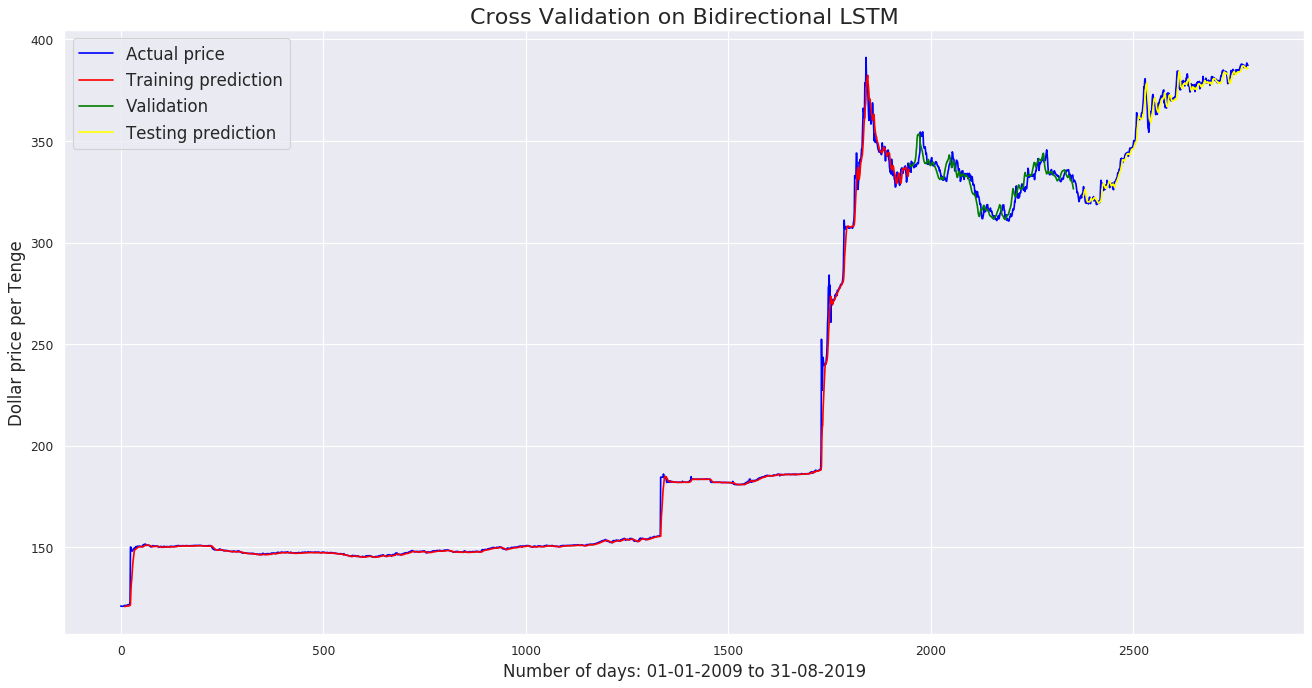

In [8]:
d = dataset.astype('float32')
testing_scores= model.evaluate(test_X1, test_y, verbose=0)

training_prediction = model.predict(train_X1)
valid_prediction = model.predict(valid_X1)
valid_prediction3 = np.empty_like(d)
valid_prediction3[:, :] = np.nan
valid_prediction3[len(training_prediction)+k:len(valid_prediction)+k+len(training_prediction), :] = valid_prediction
testing_prediction = model.predict(test_X1)
testing_prediction3 = np.empty_like(d)
testing_prediction3[:, :] = np.nan
testing_prediction3[len(valid_prediction)+3*k+3+len(training_prediction):, :] = testing_prediction

training_prediction3 = np.empty_like(d)
training_prediction3[:, :] = np.nan
training_prediction3[k:len(training_prediction)+k, :] = training_prediction
print("The maximum error in the validation part: %.2f MSE (%.2f RMSE)" %(max(errs), math.sqrt(max(errs))))
print("The average error in the validation part: %.2f MSE (%.2f RMSE)" % (np.mean(errs), math.sqrt(np.mean(errs))))
print('Test Score: %.2f MSE (%.2f RMSE)' % (testing_scores, math.sqrt(testing_scores)))
sns.set()
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(d,label='Actual price',color="blue")
plt.plot(training_prediction3,label='Training prediction',color="red")
plt.plot(valid_prediction3,label= 'Validation',color='green')
plt.plot(testing_prediction3,label= 'Testing prediction',color='yellow')


plt.xlabel('Number of days: 01-01-2009 to 31-08-2019', fontsize=15)
plt.ylabel('Dollar price per Tenge', fontsize=15)
plt.title('Cross Validation on Bidirectional LSTM', fontsize=20)
plt.legend(fontsize=15)
plt.show()
plt.show()


